In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # opcional, mas útil para o gráfico
from scipy.stats import pearsonr

In [3]:
# Caminho para o shapefile
shp_path = r"..\..\Data\Processed\PT-FireSprd_v2.1\L2_FireBehavior\PT-FireProg_v2.1_L2_model.shp"

# 1. Ler o shapefile
gdf = gpd.read_file(shp_path)

# 4. Listar as variáveis restantes
print("\n=== Variáveis mantidas para análise ===")
print(gdf.columns.tolist())

c:\Users\dias3\miniconda3\envs\geoenv\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()



=== Variáveis mantidas para análise ===
['inidoy', 'enddoy', 'ros_p', '1_3y_fir_p', '3_8y_fir_p', '8_ny_fir_p', 'elev_av', 'aspect_av', 'landform', 'fuel_model', 'f_load_av', 'land_use', 'CBH_m_av', 'CBH_m_mn', 'CBH_m_mx', 'HigCC_p_av', 'HigCC_p_mn', 'HigCC_p_mx', 'LowCC_p_av', 'LowCC_p_mn', 'LowCC_p_mx', 'MidCC_p_av', 'MidCC_p_mn', 'MidCC_p_mx', 'TotCC_p_av', 'TotCC_p_mn', 'TotCC_p_mx', 'BLH_m_av', 'BLH_m_mn', 'BLH_m_mx', 'Cape_av', 'Cape_mn', 'Cape_mx', 'Cin_av', 'Cin_mn', 'Cin_mx', 'gp_m2s2_av', 'gp_m2s2_mn', 'gp_m2s2_mx', 't_2m_C_av', 't_2m_C_mn', 't_2m_C_mx', 'd_2m_C_av', 'd_2m_C_mn', 'd_2m_C_mx', 'sP_hPa_av', 'sP_hPa_mn', 'sP_hPa_mx', 'wv10_kh_av', 'wv10_kh_mn', 'wv10_kh_mx', 'wdir10_av', 'wv100_k_av', 'wv100_k_mn', 'wv100_k_mx', 'wdir100_av', 'rh_2m_av', 'rh_2m_mn', 'rh_2m_mx', 'VPD_Pa_av', 'VPD_Pa_mn', 'VPD_Pa_mx', 'dfmc_av', 'dfmc_mn', 'dfmc_mx', 'sW_1m_av', 'sW_1m_mn', 'sW_1m_mx', 'sW_3m_av', 'sW_3m_mn', 'sW_3m_mx', 'LCL_hPa_av', 'LCL_hPa_mn', 'LCL_hPa_mx', 'LCL_m_av', 'LCL_

In [4]:
# 3. Selecionar apenas as variáveis numéricas
num_df = gdf.select_dtypes(include=["number"])

# 4. Calcular a matriz de correlação
corr_matrix = num_df.corr()

print("\n=== Matriz de correlação (numéricas) ===")
print(corr_matrix)


=== Matriz de correlação (numéricas) ===
              inidoy    enddoy     ros_p  1_3y_fir_p  3_8y_fir_p  8_ny_fir_p  \
inidoy      1.000000  0.999992  0.273226    0.029877    0.150687   -0.316853   
enddoy      0.999992  1.000000  0.271823    0.030687    0.151297   -0.317164   
ros_p       0.273226  0.271823  1.000000   -0.054563    0.013284   -0.049602   
1_3y_fir_p  0.029877  0.030687 -0.054563    1.000000    0.100298   -0.176037   
3_8y_fir_p  0.150687  0.151297  0.013284    0.100298    1.000000   -0.351681   
...              ...       ...       ...         ...         ...         ...   
ros_p_lg7   0.389995  0.389208  0.279457   -0.042191   -0.025032   -0.114065   
ros_p_lg8   0.349902  0.348996  0.244801   -0.036139    0.017629   -0.094964   
ros_p_lg9   0.316134  0.315361  0.230927   -0.030307    0.016948   -0.060527   
ros_p_lg10  0.290033  0.289294  0.291791   -0.010820    0.011993   -0.025208   
duration   -0.239981 -0.239014 -0.194193   -0.007138    0.021461    0.072620  

In [5]:
plt.figure(
    figsize=(
        max(10, 0.6 * len(corr_matrix.columns)),   # largura proporcional ao nº de variáveis
        max(8, 0.5 * len(corr_matrix.columns))    # altura menor para ficar mais "quadrado"
    )
)

ax = sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    annot=False,
    linewidths=0.3,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Matriz de Correlação das Variáveis Ambientais e de Velocidade de Propagação do Fogo",
    fontsize=136,   # título maior
    pad=140
)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(
    labelsize=72,    # tamanho da fonte
    length=30,       # comprimento dos ticks (aumenta o espaço visual)
    width=5,        # largura dos ticks
    direction='out'  # ou 'in' para ticks para dentro
)
# Rótulos maiores e mais legíveis
plt.xticks(rotation=90, fontsize=22)
plt.yticks(rotation=0, fontsize=22)

plt.tight_layout()
plt.show()


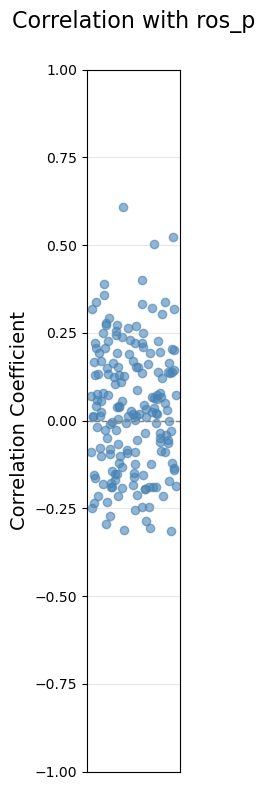

All variables correlation with ros_p:
ros_p_lg1                      +0.6078
ros_p_lg2                      +0.5220
ros_p_lg3                      +0.5031
wSv_1_mn                       +0.4019
ros_p_lg4                      +0.3897
wv100_k_mx                     +0.3572
wv100_k_av                     +0.3373
wv_850_av                      +0.3370
ros_p_lg5                      +0.3311
ros_p_lg6                      +0.3212
HDW_mn                         +0.3188
wSv_1_av                       +0.3183
wv_950_av                      +0.3034
ros_p_lg10                     +0.2918
ros_p_lg7                      +0.2795
inidoy                         +0.2732
enddoy                         +0.2718
HDW_av                         +0.2696
wv10_kh_av                     +0.2643
LCL_m_mn                       +0.2539
wv100_k_mn                     +0.2501
wv10_kh_mx                     +0.2485
ros_p_lg8                      +0.2448
EL_m_mn                        +0.2394
ros_p_lg9                 

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular correlação de todas as variáveis numéricas com ros_p
corr_with_ros_p = num_df.corr()['ros_p'].drop('ros_p').sort_values(ascending=False)

# Scatter plot unidimensional com offset no eixo x
np.random.seed(42)  # para reproducibilidade
x_offsets = 1 + np.random.uniform(-0.05, 0.05, size=len(corr_with_ros_p))  # pequeno jitter

plt.figure(figsize=(2, 8))
plt.scatter(x_offsets, corr_with_ros_p.values, color='steelblue', alpha=0.6)

# Linha de referência em 0
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Adiciona legendas para top 5 e bottom 5 valores de correlação
top5 = corr_with_ros_p.head(10)
bottom5 = corr_with_ros_p.tail(10)

plt.title('Correlation with ros_p', fontsize=16, pad=30)
plt.xticks([])  # remove ticks do eixo x

# Configurar limites de correlação (-1 a 1)
plt.ylim(-1, 1)

plt.ylabel("Correlation Coefficient", fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Imprime TODAS as correlações com melhor formatação
print("All variables correlation with ros_p:")
print("=" * 50)
for variable, correlation in corr_with_ros_p.items():
    print(f"{variable:30} {correlation:+.4f}")

C:\Users\dias3\AppData\Local\Temp\ipykernel_19196\1580258101.py:48: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


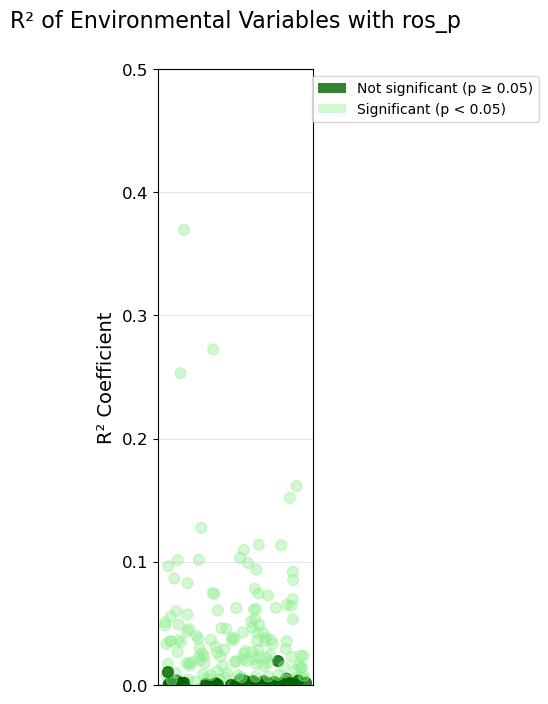

VARIÁVEIS COM CORRELAÇÃO ESTATISTICAMENTE NÃO NULA vs NULA

🎯 VARIÁVEIS COM CORRELAÇÃO NÃO NULA (p < 0.05): 131 variáveis
----------------------------------------------------------------------
 1. ros_p_lg1                      R² = 0.3695 | p = 0.000000
 2. ros_p_lg2                      R² = 0.2725 | p = 0.000000
 3. ros_p_lg3                      R² = 0.2531 | p = 0.000000
 4. wSv_1_mn                       R² = 0.1615 | p = 0.000000
 5. ros_p_lg4                      R² = 0.1519 | p = 0.000000
 6. wv100_k_mx                     R² = 0.1276 | p = 0.000000
 7. wv100_k_av                     R² = 0.1138 | p = 0.000000
 8. wv_850_av                      R² = 0.1136 | p = 0.000000
 9. ros_p_lg5                      R² = 0.1097 | p = 0.000000
10. ros_p_lg6                      R² = 0.1031 | p = 0.000000
11. HDW_mn                         R² = 0.1016 | p = 0.000000
12. wSv_1_av                       R² = 0.1013 | p = 0.000000
13. d_2m_C_mx                      R² = 0.0990 | p = 0.000000
1

In [7]:
# Você já tem isso:
corr_with_ros_p = num_df.corr()['ros_p'].drop('ros_p').sort_values(ascending=False)

# R² é simplesmente:
r2_with_ros_p = corr_with_ros_p ** 2

# Calcular p-values para determinar significância
significant_vars = []
p_values_dict = {}
for col in r2_with_ros_p.index:
    if col != 'ros_p':
        mask = ~(num_df[col].isna() | num_df['ros_p'].isna())
        if mask.sum() > 2:
            correlation, p_value = pearsonr(num_df.loc[mask, col], num_df.loc[mask, 'ros_p'])
            significant_vars.append(p_value < 0.05)
            p_values_dict[col] = p_value
        else:
            significant_vars.append(False)
            p_values_dict[col] = 1.0

# Converter para array numpy
significant_vars = np.array(significant_vars)

# Plot do R² com cores baseadas na significância
plt.figure(figsize=(2, 8))
x_offsets = 1 + np.random.uniform(-0.05, 0.05, size=len(r2_with_ros_p))

colors = np.where(significant_vars, 'lightgreen', 'darkgreen')
alphas = np.where(significant_vars, 0.4, 0.8)

plt.scatter(x_offsets, r2_with_ros_p.values, color=colors, alpha=alphas, s=60)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.title('R² of Environmental Variables with ros_p', fontsize=16, pad=30)
plt.xticks([])
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.ylabel("R² Coefficient", fontsize=14)
plt.grid(axis='y', alpha=0.3)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='darkgreen', alpha=0.8, label='Not significant (p ≥ 0.05)'),
    Patch(facecolor='lightgreen', alpha=0.4, label='Significant (p < 0.05)')
]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(2.5, 1))

plt.tight_layout()
plt.show()

# LISTA COMPLETA SEPARADA POR SIGNIFICÂNCIA ESTATÍSTICA
print("=" * 80)
print("VARIÁVEIS COM CORRELAÇÃO ESTATISTICAMENTE NÃO NULA vs NULA")
print("=" * 80)

# Separar variáveis por significância estatística
vars_nao_nulas = []  # p-value < 0.05 → correlação NÃO NULA
vars_nulas = []       # p-value ≥ 0.05 → correlação NULA

for var in r2_with_ros_p.index:
    r2_val = r2_with_ros_p[var]
    p_val = p_values_dict.get(var, 1.0)
    
    if p_val < 0.05:
        vars_nao_nulas.append((var, r2_val, p_val))
    else:
        vars_nulas.append((var, r2_val, p_val))

# Ordenar por R² (maior para menor)
vars_nao_nulas.sort(key=lambda x: x[1], reverse=True)
vars_nulas.sort(key=lambda x: x[1], reverse=True)

print(f"\n🎯 VARIÁVEIS COM CORRELAÇÃO NÃO NULA (p < 0.05): {len(vars_nao_nulas)} variáveis")
print("-" * 70)
for i, (var, r2_val, p_val) in enumerate(vars_nao_nulas, 1):
    print(f"{i:2d}. {var:30} R² = {r2_val:.4f} | p = {p_val:.6f}")

print(f"\n❌ VARIÁVEIS COM CORRELAÇÃO NULA (p ≥ 0.05): {len(vars_nulas)} variáveis")
print("-" * 70)
for i, (var, r2_val, p_val) in enumerate(vars_nulas, 1):
    print(f"{i:2d}. {var:30} R² = {r2_val:.4f} | p = {p_val:.6f}")

# Estatísticas resumidas
print(f"\n📋 RESUMO ESTATÍSTICO:")
print(f"Total de variáveis analisadas: {len(r2_with_ros_p)}")
print(f"Variáveis com correlação NÃO NULA (estatisticamente significativas): {len(vars_nao_nulas)}")
print(f"Variáveis com correlação NULA (não significativas): {len(vars_nulas)}")
print(f"Proporção de variáveis significativas: {len(vars_nao_nulas)/len(r2_with_ros_p)*100:.1f}%")

# Top 5 variáveis com maior R² entre as significativas
print(f"\n🏆 TOP 5 VARIÁVEIS SIGNIFICATIVAS COM MAIOR R²:")
if vars_nao_nulas:
    top5_significativas = vars_nao_nulas[:5]
    for i, (var, r2_val, p_val) in enumerate(top5_significativas, 1):
        print(f"{i:2d}. {var:30} R² = {r2_val:.4f} | p = {p_val:.6f}")
else:
    print("Nenhuma variável significativa encontrada")

Top 5 colunas com maior skewness:
             Skewness
wSdir_9_mx  16.800914
wSv_9_mx    14.168384
LowCC_p_mn   9.558153
1_3y_fir_p   6.346861
wSdir_9_av   5.610313

Bottom 5 colunas com menor skewness:
             Skewness
wSv_9_av   -27.615831
wSdir_9_mn -21.745335
wSv_9_mn   -20.689272
fuel_model  -5.950475
wSdir_1_mn  -2.870874


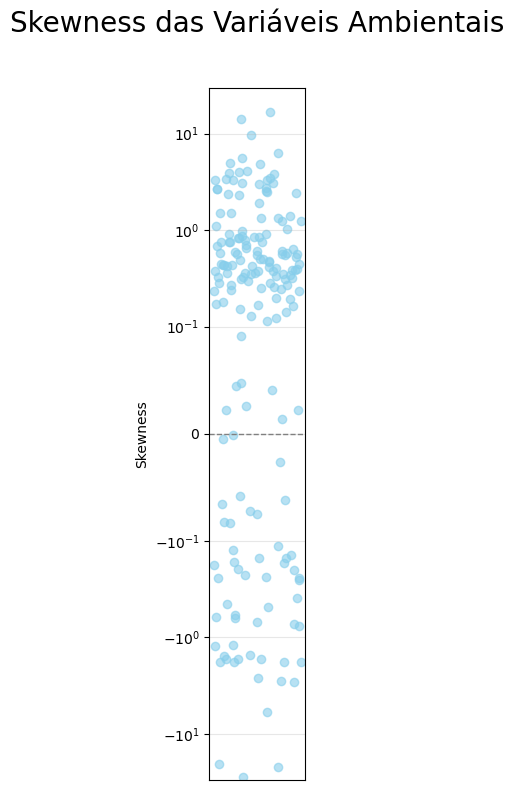

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np

# Seleciona apenas colunas numéricas, excluindo 'ros_p' e 'geometry'
numeric_cols = gdf.drop(columns=['ros_p', 'geometry'], errors='ignore').select_dtypes(include='number')

# Calcula a skewness usando scipy.stats.skew
skew_vals = numeric_cols.apply(lambda x: skew(x.dropna()))

# Seleciona top 5 e bottom 5 colunas
top5 = skew_vals.sort_values(ascending=False).head(5)
bottom5 = skew_vals.sort_values(ascending=True).head(5)

# Imprime tabela ao lado
print("Top 5 colunas com maior skewness:")
print(top5.to_frame(name='Skewness'))
print("\nBottom 5 colunas com menor skewness:")
print(bottom5.to_frame(name='Skewness'))

# Scatter plot unidimensional com offset no eixo x
np.random.seed(42)  # para reproducibilidade
x_offsets = 1 + np.random.uniform(-0.05, 0.05, size=len(skew_vals))  # pequeno jitter

plt.figure(figsize=(2, 8))
plt.scatter(x_offsets, skew_vals, color='skyblue', alpha=0.6)

# Linha de referência em 0
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.title('Skewness das Variáveis Ambientais', fontsize=20, pad=40)
plt.xticks([])  # remove ticks do eixo x
plt.yscale('symlog', linthresh=0.1)
plt.ylim(-30, 30)
plt.ylabel('Skewness')
plt.grid(axis='y', alpha=0.3)

# Ajusta o layout
plt.tight_layout()
plt.show()


In [9]:
from scipy.stats import pearsonr
import pandas as pd

# Lista para armazenar resultados
results = []

# Calcular correlação e p-value para cada variável vs ros_p
for col in num_df.columns:
    if col != 'ros_p':
        # Remover NaNs para o cálculo
        mask = ~(num_df[col].isna() | num_df['ros_p'].isna())
        if mask.sum() > 2:  # mínimo de observações
            correlation, p_value = pearsonr(num_df.loc[mask, col], num_df.loc[mask, 'ros_p'])
            r_squared = correlation ** 2
            results.append({
                'variable': col,
                'correlation': correlation,
                'r_squared': r_squared,
                'p_value': p_value,
                'n_observations': mask.sum()
            })

# Converter para DataFrame
results_df = pd.DataFrame(results)

# Ordenar por R²
results_df = results_df.sort_values('r_squared', ascending=False)

# Adicionar coluna de significância
alpha = 0.05  # nível de significância
results_df['significant'] = results_df['p_value'] < alpha

# Filtrar apenas as variáveis significativas
significant_vars = results_df[results_df['significant']].copy()

# FILTRAR VARIÁVEIS NÃO SIGNIFICATIVAS
non_significant_vars = results_df[~results_df['significant']].copy()

print(f"Variáveis com R² estatisticamente significativo (p < {alpha}):")
print(f"Total: {len(significant_vars)} de {len(results_df)} variáveis")
print("\n" + "="*80)

# Mostrar resultados formatados
for _, row in significant_vars.iterrows():
    significance = "***" if row['p_value'] < 0.001 else "**" if row['p_value'] < 0.01 else "*"
    print(f"{row['variable']:30} | R² = {row['r_squared']:.4f} | p = {row['p_value']:.6f} {significance}")

# Estatísticas resumidas
print("\n" + "="*80)
print("ESTATÍSTICAS RESUMIDAS:")
print(f"Variáveis testadas: {len(results_df)}")
print(f"Variáveis significativas: {len(significant_vars)}")
print(f"Variáveis NÃO significativas: {len(non_significant_vars)}")
print(f"Taxa de significância: {len(significant_vars)/len(results_df)*100:.1f}%")
print(f"R² médio entre significativas: {significant_vars['r_squared'].mean():.4f}")
print(f"R² máximo: {significant_vars['r_squared'].max():.4f}")
print(f"R² mínimo entre significativas: {significant_vars['r_squared'].min():.4f}")

# LISTA DAS VARIÁVEIS NÃO SIGNIFICATIVAS
print("\n" + "="*80)
print("VARIÁVEIS NÃO SIGNIFICATIVAS (p ≥ 0.05):")
print("="*80)
if len(non_significant_vars) > 0:
    for _, row in non_significant_vars.iterrows():
        print(f"{row['variable']:30} | R² = {row['r_squared']:.4f} | p = {row['p_value']:.4f}")
else:
    print("Todas as variáveis são estatisticamente significativas!")

# Estatísticas das não significativas
print(f"\nEstatísticas das variáveis não significativas:")
print(f"R² médio: {non_significant_vars['r_squared'].mean():.4f}")
print(f"R² máximo: {non_significant_vars['r_squared'].max():.4f}")
print(f"R² mínimo: {non_significant_vars['r_squared'].min():.4f}")


Variáveis com R² estatisticamente significativo (p < 0.05):
Total: 131 de 179 variáveis

ros_p_lg1                      | R² = 0.3695 | p = 0.000000 ***
ros_p_lg2                      | R² = 0.2725 | p = 0.000000 ***
ros_p_lg3                      | R² = 0.2531 | p = 0.000000 ***
wSv_1_mn                       | R² = 0.1615 | p = 0.000000 ***
ros_p_lg4                      | R² = 0.1519 | p = 0.000000 ***
wv100_k_mx                     | R² = 0.1276 | p = 0.000000 ***
wv100_k_av                     | R² = 0.1138 | p = 0.000000 ***
wv_850_av                      | R² = 0.1136 | p = 0.000000 ***
ros_p_lg5                      | R² = 0.1097 | p = 0.000000 ***
ros_p_lg6                      | R² = 0.1031 | p = 0.000000 ***
HDW_mn                         | R² = 0.1016 | p = 0.000000 ***
wSv_1_av                       | R² = 0.1013 | p = 0.000000 ***
d_2m_C_mx                      | R² = 0.0990 | p = 0.000000 ***
CircVar                        | R² = 0.0963 | p = 0.000000 ***
rh_2m_mx       

In [10]:
transformations = [
    ("inidoy", 0.0000, 0.0000),
    ("enddoy", 0.0000, 0.0000),
    ("ros_p", 0.12, 0.0037),
    ("1_3y_fir_p", -2.95, 0.0000),
    ("3_8y_fir_p", 0.0000, 0.0000),
    ("8_ny_fir_p", 0.70, 0.0000),
    ("elev_av", 0.67, 0.0000),
    ("aspect_av", 0.97, 0.0000),
    ("landform", 0.52, 0.0000),
    ("fuel_model", 0.0000, 0.0000),
    ("f_load_av", 0.91, 0.0000),
    ("land_use", 1.63, 0.0000),
    ("CBH_m_av", 0.64, 0.0694),
    ("CBH_m_mn", 0.62, 0.2899),
    ("CBH_m_mx", 0.64, 0.1428),
    ("HigCC_p_av", 0.0000, 0.0000),
    ("HigCC_p_mn", 0.0000, 0.0000),
    ("HigCC_p_mx", 0.0000, 0.0000),
    ("LowCC_p_av", -33.00, 0.0000),
    ("LowCC_p_mn", -100.72, 0.0000),
    ("LowCC_p_mx", -19.85, 0.0000),
    ("MidCC_p_av", -14.32, 0.0000),
    ("MidCC_p_mn", -25.11, 0.0000),
    ("MidCC_p_mx", -9.55, 0.0000),
    ("TotCC_p_av", 0.0000, 0.0000),
    ("TotCC_p_mn", 0.0000, 0.0000),
    ("TotCC_p_mx", 0.0000, 0.0000),
    ("BLH_m_av", 0.30, 0.2745),
    ("BLH_m_mn", 0.19, 0.0000),
    ("BLH_m_mx", 0.40, 0.0000),
    ("Cape_av", 0.0000, 0.0000),
    ("Cape_mn", 0.0000, 0.0000),
    ("Cape_mx", 0.0000, 0.0000),
    ("Cin_av", 0.42, 0.0006),
    ("Cin_mn", 0.34, 0.0006),
    ("Cin_mx", 0.54, 0.0186),
    ("gp_m2s2_av", 0.0000, 0.0001),
    ("gp_m2s2_mn", 0.0000, 0.0000),
    ("gp_m2s2_mx", 0.0000, 0.0001),
    ("t_2m_C_av", 0.22, 0.0000),
    ("t_2m_C_mn", -0.04, 0.0000),
    ("t_2m_C_mx", 0.0000, 0.0000),
    ("d_2m_C_av", 1.32, 0.0000),
    ("d_2m_C_mn", 1.24, 0.0000),
    ("d_2m_C_mx", 1.37, 0.0000),
    ("sP_hPa_av", 0.33, 0.1413),
    ("sP_hPa_mn", 0.38, 0.1398),
    ("sP_hPa_mx", 0.29, 0.1290),
    ("wv10_kh_av", 0.25, 0.0027),
    ("wv10_kh_mn", 0.27, 0.0000),
    ("wv10_kh_mx", 0.33, 0.0398),
    ("wdir10_av", 0.91, 0.0000),
    ("wv100_k_av", 0.38, 0.0000),
    ("wv100_k_mn", 0.39, 0.0000),
    ("wv100_k_mx", 0.43, 0.0858),
    ("wdir100_av", 0.91, 0.0000),
    ("rh_2m_av", 0.0000, 0.0000),
    ("rh_2m_mn", 0.06, 0.0000),
    ("rh_2m_mx", 0.0000, 0.0000),
    ("VPD_Pa_av", 0.36, 0.0000),
    ("VPD_Pa_mn", 0.32, 0.0000),
    ("VPD_Pa_mx", 0.0000, 0.0000),
    ("dfmc_av", 0.0000, 0.0000),
    ("dfmc_mn", -0.76, 0.0000),
    ("dfmc_mx", 0.0000, 0.0000),
    ("sW_1m_av", 12.96, 0.0000),
    ("sW_1m_mn", 12.95, 0.0000),
    ("sW_1m_mx", 12.98, 0.0000),
    ("sW_3m_av", 14.56, 0.0000),
    ("sW_3m_mn", 14.56, 0.0000),
    ("sW_3m_mx", 14.56, 0.0001),
    ("LCL_hPa_av", 0.0000, 0.0000),
    ("LCL_hPa_mn", 0.0000, 0.0000),
    ("LCL_hPa_mx", 0.0000, 0.0000),
    ("LCL_m_av", 0.65, 0.0000),
    ("LCL_m_mn", 0.36, 0.0000),
    ("LCL_m_mx", 0.0000, 0.0000),
    ("HDW_av", 0.30, 0.0000),
    ("HDW_mn", 0.25, 0.0000),
    ("HDW_mx", 0.43, 0.0000),
    ("Haines_av", 0.76, 0.0000),
    ("Haines_mn", 0.0000, 0.0000),
    ("Haines_mx", 0.0000, 0.0000),
    ("wSv_9_av", 1.13, 0.0000),
    ("wSv_9_mn", 1.25, 0.0000),
    ("wSv_9_mx", 0.92, 0.0000),
    ("wSdir_9_av", 0.96, 0.0000),
    ("wSdir_9_mn", 1.09, 0.0000),
    ("wSdir_9_mx", 0.83, 0.0000),
    ("wSv_7_av", 0.83, 0.3506),
    ("wSv_7_mn", 0.85, 0.1251),
    ("wSv_7_mx", 0.81, 0.7985),
    ("wSdir_7_av", 0.95, 0.5293),
    ("wSdir_7_mn", 0.96, 0.4128),
    ("wSdir_7_mx", 0.93, 0.8128),
    ("wSv_5_av", 0.68, 0.9468),
    ("wSv_5_mn", 0.72, 0.8210),
    ("wSv_5_mx", 0.70, 0.9623),
    ("wSdir_5_av", 0.95, 0.2517),
    ("wSdir_5_mn", 0.95, 0.8296),
    ("wSdir_5_mx", 0.93, 0.9131),
    ("wSv_1_av", 0.96, 0.0034),
    ("wSv_1_mn", 0.94, 0.0386),
    ("wSv_1_mx", 0.96, 0.0017),
    ("wSdir_1_av", 1.07, 0.0000),
    ("wSdir_1_mn", 1.10, 0.0000),
    ("wSdir_1_mx", 0.0000, 0.0000),
    ("gT_s_9_av", 1.41, 0.0000),
    ("gT_s_9_mn", 1.41, 0.0000),
    ("gT_s_9_mx", 1.37, 0.0000),
    ("gT_9_8_av", 0.0000, 0.0000),
    ("gT_9_8_mn", 0.0000, 0.0000),
    ("gT_9_8_mx", 0.0000, 0.0000),
    ("gT_8_7_av", 0.0000, 0.0000),
    ("gT_8_7_mn", 0.0000, 0.0000),
    ("gT_8_7_mx", 0.0000, 0.0000),
    ("gT_7_5_av", 1.50, 0.2065),
    ("gT_7_5_mn", 1.62, 0.2000),
    ("gT_7_5_mx", 1.29, 0.3228),
    ("gT_5_3_av", -0.88, 0.6708),
    ("gT_5_3_mn", -0.39, 0.9840),
    ("gT_5_3_mx", -0.82, 0.6220),
    ("CMLG_av", 0.74, 0.1651),
    ("CMLG_mn", 0.58, 0.2672),
    ("CMLG_mx", 0.70, 0.0405),
    ("LFC_hPa_av", 0.76, 0.0000),
    ("LFC_hPa_mn", 0.56, 0.0000),
    ("LFC_hPa_mx", 0.0000, 0.0000),
    ("CCL_hPa_av", 0.42, 0.0000),
    ("CCL_hPa_mn", 0.36, 0.0000),
    ("CCL_hPa_mx", 0.47, 0.0000),
    ("EL_m_av", 2.35, 0.3814),
    ("EL_m_mn", 2.05, 0.4454),
    ("EL_m_mx", 2.45, 0.8780),
    ("VentIdx_av", 0.10, 0.0931),
    ("VentIdx_mn", 2.24, 0.1835),
    ("VentIdx_mx", -3.13, 0.7082),
    ("LiftIdx_av", 1.08, 0.0000),
    ("LiftIdx_mn", 0.0000, 0.0000),
    ("LiftIdx_mx", 0.0000, 0.0000),
    ("gp_300_av", 0.0000, 0.0000),
    ("rh_950_av", 0.30, 0.8800),
    ("rh_850_av", 0.33, 0.0045),
    ("rh_700_av", 0.0000, 0.0000),
    ("rh_500_av", 0.0000, 0.0000),
    ("rh_300_av", 0.36, 0.0000),
    ("t_950_av", 0.0000, 0.0000),
    ("t_850_av", 0.0000, 0.0000),
    ("t_700_av", 1.08, 0.0000),
    ("t_500_av", 1.08, 0.0000),
    ("t_300_av", -2.31, 0.7024),
    ("w_950_av", 0.67, 0.0000),
    ("w_850_av", 1.17, 0.0000),
    ("w_700_av", 0.90, 0.0000),
    ("w_500_av", 1.72, 0.0000),
    ("w_300_av", 1.74, 0.0000),
    ("wv_950_av", 0.02, 0.0000),
    ("wv_850_av", 0.38, 0.0001),
    ("wv_700_av", 0.47, 0.0000),
    ("wv_500_av", 0.54, 0.0004),
    ("wv_300_av", 0.40, 0.0000),
    ("Recirc", 0.0000, 0.0000),
    ("CircVar", 0.0000, 0.0000),
    ("CircStd_dg", 0.0000, 0.0000),
    ("BLH_m_rt", 0.22, 0.8257),
    ("ros_p_lag1", 0.15, 0.2918),
    ("ros_p_lag2", 0.16, 0.0617),
    ("ros_p_lag3", 0.14, 0.0181),
    ("ros_p_lag4", 0.19, 0.0027),
    ("ros_p_lag5", 0.06, 0.1338),
    ("ros_p_lag6", -0.03, 0.9941),
    ("ros_p_lag7", -0.03, 0.9998),
    ("ros_p_lag8", -0.02, 0.9531),
    ("ros_p_lag9", -0.02, 0.7827),
    ("ros_p_lag10", -0.01, 0.5037),
    ("duration", 0.26, 0.0000)
]


Top 5 variables with highest p-value improvement:
    Improvement
19       100.72
18        33.00
22        25.11
20        19.85
21        14.32

Bottom 5 variables with lowest p-value improvement:
    Improvement
69     -14.5600
68     -14.5600
70     -14.5599
67     -12.9800
65     -12.9600


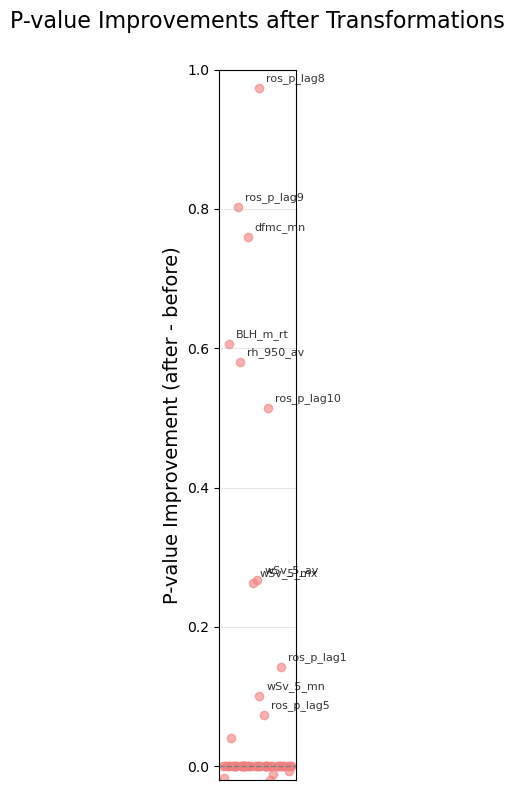


Statistics of p-value improvements:
Mean improvement: 0.4230
Median improvement: -0.2301
Standard deviation: 8.8472
Number of positive improvements: 28/176
Number of negative improvements: 104/176


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extraer los datos de mejoras en p-values
variables = [t[0] for t in transformations]
p_before = [t[1] for t in transformations]
p_after = [t[2] for t in transformations]
improvements = [after - before for before, after in zip(p_before, p_after)]

# Crear DataFrame
df_improvements = pd.DataFrame({
    'variable': variables,
    'p_before': p_before,
    'p_after': p_after,
    'improvement': improvements
})

# Seleciona top 5 e bottom 5 colunas
top5 = df_improvements['improvement'].sort_values(ascending=False).head(5)
bottom5 = df_improvements['improvement'].sort_values(ascending=True).head(5)

# Imprime tabela ao lado
print("Top 5 variables with highest p-value improvement:")
print(top5.to_frame(name='Improvement'))
print("\nBottom 5 variables with lowest p-value improvement:")
print(bottom5.to_frame(name='Improvement'))

# Scatter plot unidimensional com offset no eixo x
np.random.seed(42)  # para reproducibilidade
x_offsets = 1 + np.random.uniform(-0.05, 0.05, size=len(improvements))  # pequeno jitter

plt.figure(figsize=(2, 8))
plt.scatter(x_offsets, improvements, color='lightcoral', alpha=0.6)

# Linha de referência em 0
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Adiciona legendas para top 5 e valores com improvement > 0.05
for idx, imp in enumerate(improvements):
    if imp > 0.05:  # <-- novo filtro
        var_name = df_improvements.loc[idx, 'variable']
        plt.annotate(var_name,
                     (x_offsets[idx], improvements[idx]),
                     xytext=(5, 5), textcoords='offset points',
                     fontsize=8, alpha=0.8)

plt.title('P-value Improvements after Transformations', fontsize=16, pad=30)
plt.xticks([])  # remove ticks do eixo x
plt.ylim(-0.02, 1.0)
plt.ylabel('P-value Improvement (after - before)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Estatísticas adicionais
print(f"\nStatistics of p-value improvements:")
print(f"Mean improvement: {np.mean(improvements):.4f}")
print(f"Median improvement: {np.median(improvements):.4f}")
print(f"Standard deviation: {np.std(improvements):.4f}")
print(f"Number of positive improvements: {sum(1 for x in improvements if x > 0)}/{len(improvements)}")
print(f"Number of negative improvements: {sum(1 for x in improvements if x < 0)}/{len(improvements)}")


In [ ]:
# Individualmente